In [1]:
# required imports
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_validate
from yellowbrick.regressor import PredictionError, prediction_error, ResidualsPlot

# Loading data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

# Handling missing values

In [3]:
df = df.dropna()

# Splitting into train and test

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_lot15 

# Standardizing data

In [7]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)

# Model selection

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## cross_validate

In [9]:
scores = cross_validate(model, X=X_train_scaled, y=y_train, scoring=['r2'], cv=5)

scores['test_r2'].mean()

0.6988083163618178

## Residual historgram

/Users/marcelomiyachi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marcelomiyachi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


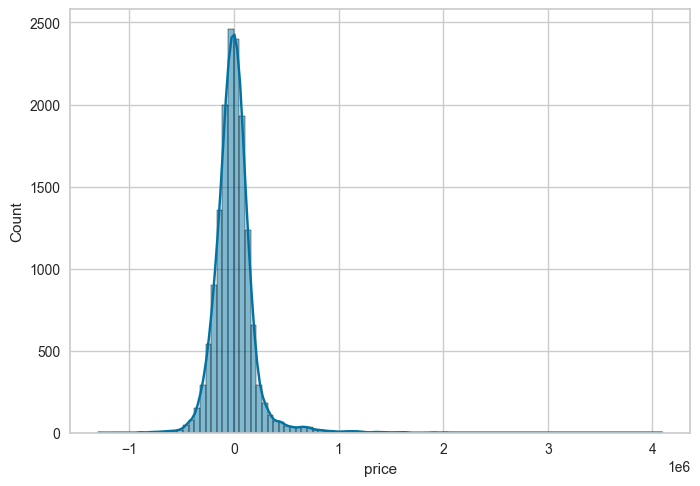

In [13]:
y_train_pred = model.predict(X_train_scaled)
sns.histplot(data=y_train-y_train_pred, kde=True, bins=100);

# Model evaluation

In [79]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

## Prediction error

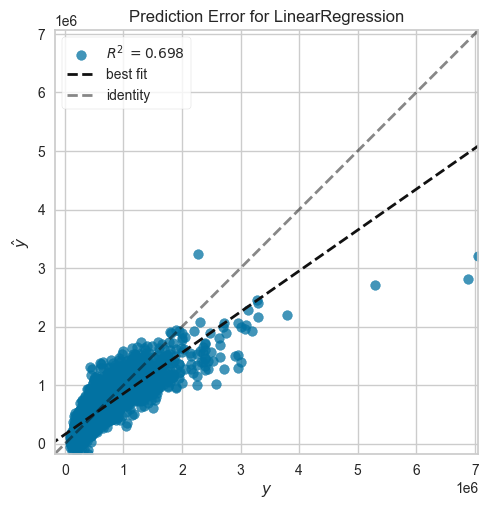

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [89]:
visualizer = PredictionError(model)

visualizer = prediction_error(model, X_train_scaled, y_train, X_test_scaled, y_test)
visualizer.show()    

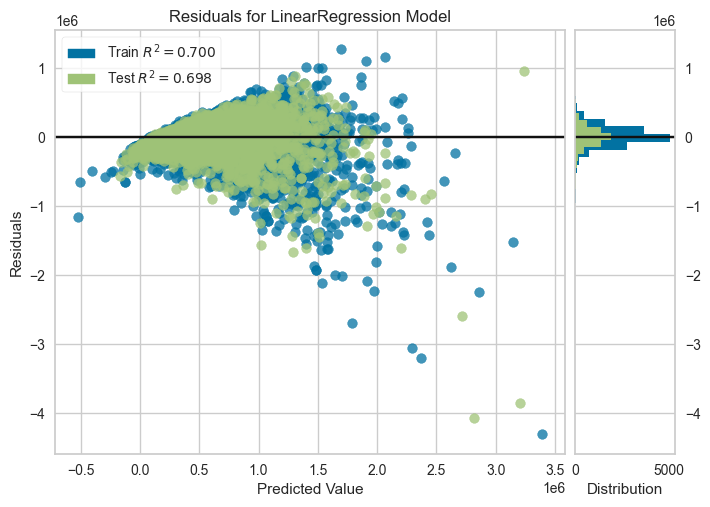

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

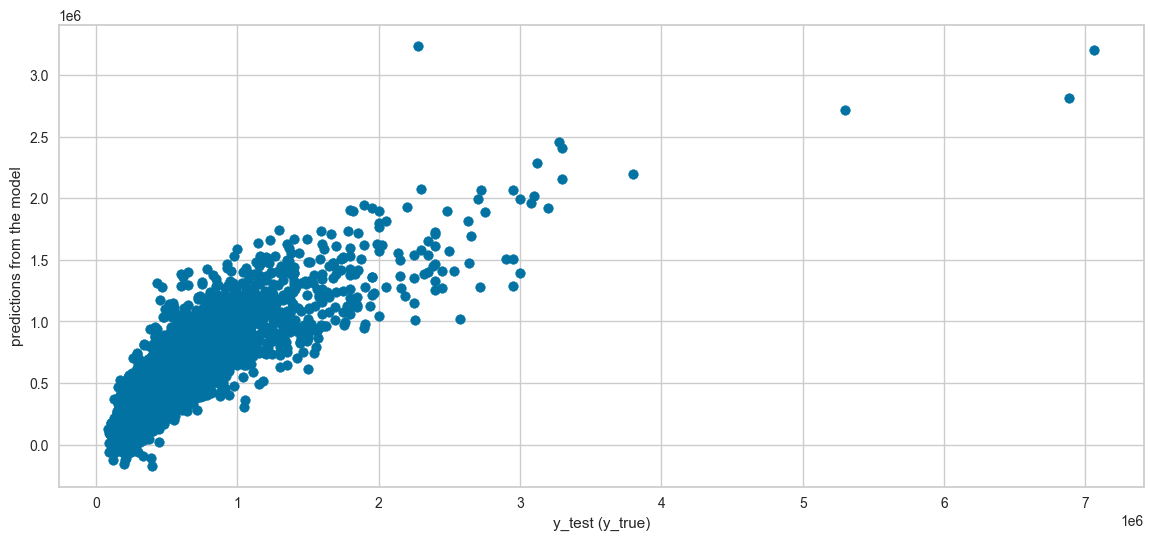

In [115]:
plt.figure(figsize=(14, 6))
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('y_test (y_true)')
plt.ylabel('predictions from the model');

## r-squared

In [80]:
metrics.r2_score(y_test, y_pred)

0.6978942185278191

## MSE

In [81]:
metrics.mean_squared_error(y_test, y_pred)

40509964202.8639

## MAE

In [82]:
metrics.mean_absolute_error(y_test, y_pred)

127046.94297667185

## RMSE

In [83]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

201270.8727135248